# AT Census Project, UC Berkeley- Cluster Variable Generation 

In [248]:
 # import necessary all library
import time
start = time.time()
import geopandas as gpd
import pandas as pd
from functools import reduce
import sys
'geopandas' in sys.modules
#!pip3 install matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import io
import pandas as pd
import networkx as nx
import osmnx as ox
import os 
from geopandas import GeoDataFrame, read_file
from geopandas.tools import overlay
import shapely.geometry as geom
import shapely.wkt

In [249]:
# Helper Function
def min_distance_ppoly(point, polygon):
    return polygon.distance(point).min()

In [250]:
#!pip install contextily

In [251]:
import warnings
warnings.filterwarnings("ignore")

# Input your buffer size here in meter unit

In [252]:
# Input your buffer size here in meter unit
# 0.1 mile=160.934m
#0.25 mile=402.336 m
#0.5 mile=804.672,
#1 mile=1609.34,
#1.5 mile=2414.02,
#2 mile=3218.69

#buffer size in meter
size=804.672 

In [253]:
eco_counter=pd.read_csv('H:/Desktop/AT Census/Count Data/Eco_OSM_City_Bike_facilities_Counter_V5.csv')
eco_counter=eco_counter.drop(['geometry'],axis=1)
eco_counter1 = gpd.GeoDataFrame(eco_counter, geometry=gpd.points_from_xy(eco_counter.long, eco_counter.lat))
eco_counter2 = eco_counter1.set_crs("EPSG:4326")
eco_counter2_proj = eco_counter2.to_crs(epsg=32610)
eco_counter2_proj.head()
#eco_counter2

id   serial_num                 user_type  \
0  100000572  T60B0090339                pedestrian   
1  100000595  U15B0090346                pedestrian   
2  100000671  X0412011792  ['bicycle' 'pedestrian']   
3  100001127                                bicycle   
4  100002415                                bicycle   

                                          domain  \
0  University of California Berkeley - AT Census   
1  University of California Berkeley - AT Census   
2  University of California Berkeley - AT Census   
3                                          SFMTA   
4                                          SFMTA   

                                           site_name        lat        long  \
0                                         Park Trail  37.798027 -122.467575   
1                                      Ecology Trail  37.792583 -122.458150   
2                                      BART AT SPIRE  37.791160 -122.459440   
3  Broadway Tunnel west of Hyde St Overpass EB (old)  37.796165 -122.419490   
4            Fell Street west of Scott WB (old site)  37.774200 -122.436295   

                                               osmid                  name  \
0                                                                            
1                                                                            
2                                          215845474  Bay Area Ridge Trail   
3  [26938250, 417092428, 87297166, 85644944, 8921...              Broadway   
4                              [24335459, 860632366]           Fell Street   

  OSM Functional Class  ...   length City Bicycle Facilities  \
0            secondary  ...    0.000                   Trail   
1            secondary  ...    0.000                   Trail   
2                 path  ...  274.000                    Path   
3              primary  ...  851.932              Bike Route   
4              primary  ...  107.844               Bike Lane   

                                         Comments1  \
0  OSM Facilities Asssigned based on Visualization   
1  OSM Facilities Asssigned based on Visualization   
2                                              NaN   
3                                              NaN   
4                                              NaN   

                          Comments2 STATEFP COUNTYFP  COUNTYNS  GEOID  \
0  City Bicycle Facilities Assigned       6       75    277302   6075   
1  City Bicycle Facilities Assigned       6       75    277302   6075   
2  City Bicycle Facilities Assigned       6       75    277302   6075   
3                               NaN       6       75    277302   6075   
4                               NaN       6       75    277302   6075   

   Location_County                        geometry  
0    San Francisco  POINT (546873.576 4183539.562)  
1    San Francisco  POINT (547706.840 4182940.320)  
2    San Francisco  POINT (547594.175 4182781.782)  
3    San Francisco  POINT (551108.196 4183358.173)  
4    San Francisco  POINT (549643.359 4180912.115)  

[5 rows x 22 columns]

In [254]:
gdf1 = eco_counter2_proj.copy()
gdf1['geometry'] = gdf1['geometry'].buffer(size)
gdf1.head()

id   serial_num                 user_type  \
0  100000572  T60B0090339                pedestrian   
1  100000595  U15B0090346                pedestrian   
2  100000671  X0412011792  ['bicycle' 'pedestrian']   
3  100001127                                bicycle   
4  100002415                                bicycle   

                                          domain  \
0  University of California Berkeley - AT Census   
1  University of California Berkeley - AT Census   
2  University of California Berkeley - AT Census   
3                                          SFMTA   
4                                          SFMTA   

                                           site_name        lat        long  \
0                                         Park Trail  37.798027 -122.467575   
1                                      Ecology Trail  37.792583 -122.458150   
2                                      BART AT SPIRE  37.791160 -122.459440   
3  Broadway Tunnel west of Hyde St Overpass EB (old)  37.796165 -122.419490   
4            Fell Street west of Scott WB (old site)  37.774200 -122.436295   

                                               osmid                  name  \
0                                                                            
1                                                                            
2                                          215845474  Bay Area Ridge Trail   
3  [26938250, 417092428, 87297166, 85644944, 8921...              Broadway   
4                              [24335459, 860632366]           Fell Street   

  OSM Functional Class  ...   length City Bicycle Facilities  \
0            secondary  ...    0.000                   Trail   
1            secondary  ...    0.000                   Trail   
2                 path  ...  274.000                    Path   
3              primary  ...  851.932              Bike Route   
4              primary  ...  107.844               Bike Lane   

                                         Comments1  \
0  OSM Facilities Asssigned based on Visualization   
1  OSM Facilities Asssigned based on Visualization   
2                                              NaN   
3                                              NaN   
4                                              NaN   

                          Comments2 STATEFP COUNTYFP  COUNTYNS  GEOID  \
0  City Bicycle Facilities Assigned       6       75    277302   6075   
1  City Bicycle Facilities Assigned       6       75    277302   6075   
2  City Bicycle Facilities Assigned       6       75    277302   6075   
3                               NaN       6       75    277302   6075   
4                               NaN       6       75    277302   6075   

   Location_County                                           geometry  
0    San Francisco  POLYGON ((547678.248 4183539.562, 547674.373 4...  
1    San Francisco  POLYGON ((548511.512 4182940.320, 548507.637 4...  
2    San Francisco  POLYGON ((548398.847 4182781.782, 548394.972 4...  
3    San Francisco  POLYGON ((551912.868 4183358.173, 551908.993 4...  
4    San Francisco  POLYGON ((550448.031 4180912.115, 550444.157 4...  

[5 rows x 22 columns]

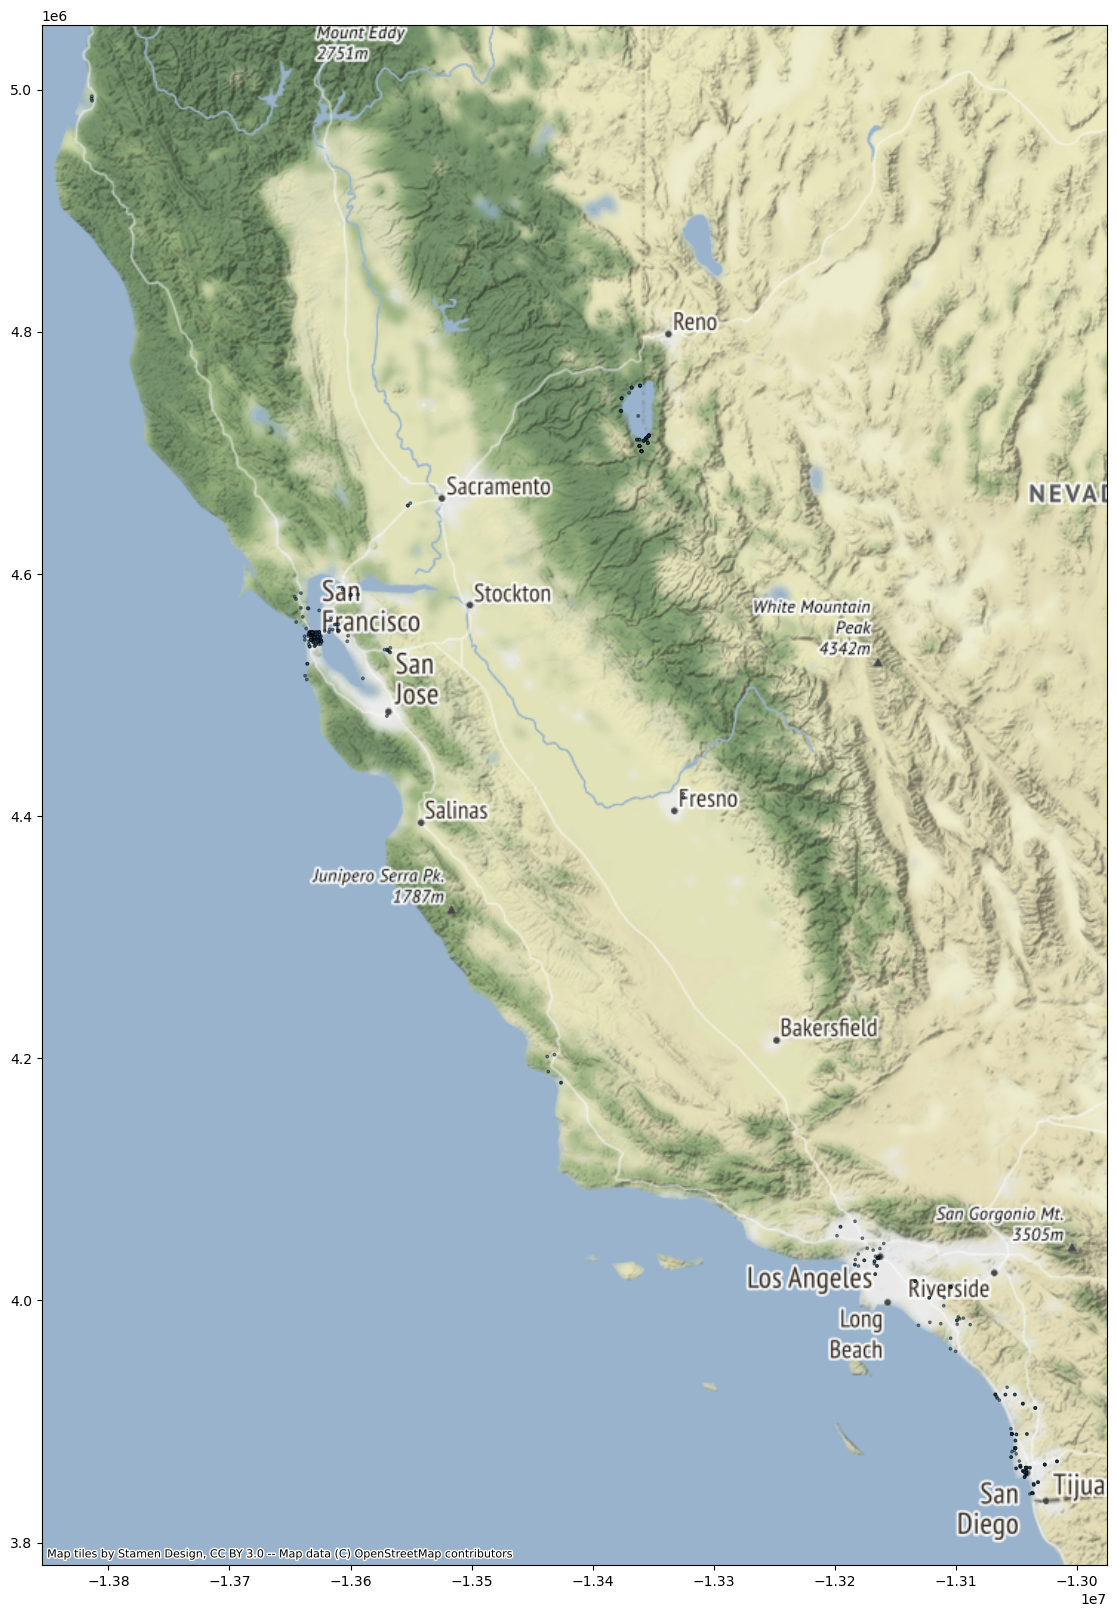

In [255]:
import contextily as ctx
gdfm = gdf1.to_crs(epsg=3857) # This EPSG-3857 just for ploting
ax = gdfm.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

# Now calculate the land use variables within the buffer

In [256]:
## Try to pull whole CA state Network using polygon
ca_poly=gpd.read_file('H:/Desktop/AT Census/OSM Bike Network/ca-state-boundary/CA_State_TIGER2016.shp',encoding='utf-8')
ca_poly2=gpd.GeoDataFrame(ca_poly, geometry='geometry', crs='EPSG:3857')
one_mile=1609.34
ca_poly2['geometry'] = ca_poly2['geometry'].buffer(one_mile)
ca_poly3=ca_poly2.to_crs("epsg:4326")
ca_poly3

REGION DIVISION STATEFP   STATENS GEOID STUSPS        NAME LSAD  MTFCC  \
0      4        9      06  01779778    06     CA  California   00  G4000   

  FUNCSTAT         ALAND       AWATER     INTPTLAT      INTPTLON  \
0        A  403501101370  20466718403  +37.1551773  -119.5434183   

                                            geometry  
0  MULTIPOLYGON (((-124.44237 40.35934, -124.4430...

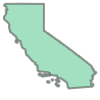

In [257]:
# lets use buffer only to extract the land use
polygon=ca_poly3.loc[0,'geometry']
polygon

In [258]:
gdf1.crs

<Derived Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [259]:
#!chcp 1252
!chcp 65001

Active code page: 65001


In [260]:
#tags = {'landuse': 'grass'}
#industrial = ox.geometries_from_polygon(polygon, tags)
#industrial.head()

In [261]:
#https://wiki.openstreetmap.org/wiki/Key:landuse
tags = {'landuse': ['grass','commercial','industrial','residential','retail','institutional','forest','education']}
landuse = ox.geometries_from_polygon(polygon, tags)
landuse.head()

barrier                     geometry highway crossing  \
element_type osmid                                                              
node         368174331      NaN  POINT (-116.95975 32.85949)     NaN      NaN   
             596183787      NaN  POINT (-117.24583 32.74844)     NaN      NaN   
             596796626      NaN  POINT (-117.22827 32.73877)     NaN      NaN   
             2214847974     NaN  POINT (-117.13396 32.72343)     NaN      NaN   
             2329997897     NaN  POINT (-117.22639 32.86046)     NaN      NaN   

                        addr:state  ele gnis:county_name gnis:feature_id  \
element_type osmid                                                         
node         368174331          CA  118        San Diego          243594   
             596183787         NaN  NaN              NaN             NaN   
             596796626         NaN  NaN              NaN             NaN   
             2214847974        NaN  NaN              NaN             NaN   
             2329997897        NaN  NaN              NaN             NaN   

                                             gnis:import_uuid gnis:reviewed  \
element_type osmid                                                            
node         368174331   57871b70-0100-4405-bb30-88b2e001a944            no   
             596183787                                    NaN           NaN   
             596796626                                    NaN           NaN   
             2214847974                                   NaN           NaN   
             2329997897                                   NaN           NaN   

                         ... P_S_COMM closest_town iata icao landuse:historic  \
element_type osmid       ...                                                    
node         368174331   ...      NaN          NaN  NaN  NaN              NaN   
             596183787   ...      NaN          NaN  NaN  NaN              NaN   
             596796626   ...      NaN          NaN  NaN  NaN              NaN   
             2214847974  ...      NaN          NaN  NaN  NaN              NaN   
             2329997897  ...      NaN          NaN  NaN  NaN              NaN   

                        agrarian iucn_level protected protection_object  \
element_type osmid                                                        
node         368174331       NaN        NaN       NaN               NaN   
             596183787       NaN        NaN       NaN               NaN   
             596796626       NaN        NaN       NaN               NaN   
             2214847974      NaN        NaN       NaN               NaN   
             2329997897      NaN        NaN       NaN               NaN   

                        site_ownership  
element_type osmid                      
node         368174331             NaN  
             596183787             NaN  
             596796626             NaN  
             2214847974            NaN  
             2329997897            NaN  

[5 rows x 730 columns]

In [262]:
landuse['landuse'].unique()

array(['residential', 'industrial', 'retail', 'forest', 'commercial',
       'grass', 'education', 'institutional'], dtype=object)

In [263]:
# Avoid this error- TopologyException: Input geom 0 is invalid: Self-intersection at 2307899.6553931381 208383.49467431975. Do the followings
landuse["geometry"]=landuse.geometry.buffer(0)
landuse = landuse.reset_index(level=0)
landuse = landuse.reset_index(level=0)
landuse.head(2)

osmid element_type barrier       geometry highway crossing addr:state  \
0  368174331         node     NaN  POLYGON EMPTY     NaN      NaN         CA   
1  596183787         node     NaN  POLYGON EMPTY     NaN      NaN        NaN   

   ele gnis:county_name gnis:feature_id  ... P_S_COMM closest_town iata icao  \
0  118        San Diego          243594  ...      NaN          NaN  NaN  NaN   
1  NaN              NaN             NaN  ...      NaN          NaN  NaN  NaN   

  landuse:historic agrarian iucn_level protected protection_object  \
0              NaN      NaN        NaN       NaN               NaN   
1              NaN      NaN        NaN       NaN               NaN   

  site_ownership  
0            NaN  
1            NaN  

[2 rows x 732 columns]

In [264]:
landuse1=landuse[['osmid','geometry','landuse']]
landuse2=gpd.GeoDataFrame(landuse1, geometry='geometry', crs={'init': 'epsg:4326'})
luse_proj = landuse2.to_crs(epsg=32610)
luse_proj.head()

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


osmid       geometry      landuse
0   368174331  POLYGON EMPTY  residential
1   596183787  POLYGON EMPTY  residential
2   596796626  POLYGON EMPTY  residential
3  2214847974  POLYGON EMPTY   industrial
4  2329997897  POLYGON EMPTY  residential

In [265]:
# Clip the data using GeoPandas clip
buffer_clip = gpd.clip(luse_proj, gdf1)
buffer_clip.head(5)

osmid                                           geometry     landuse
477   147001256  POLYGON ((1051147.546 3619847.393, 1051144.803...       grass
209    44501608  POLYGON ((1051137.055 3619910.121, 1051132.671...  commercial
2767  908524418  POLYGON ((1053068.716 3620385.885, 1053084.627...  commercial
2433  819496104  POLYGON ((1052778.610 3620465.126, 1052780.827...      retail
2804  943141878  POLYGON ((1052188.722 3620467.165, 1052185.609...      retail

In [266]:
buffer_clip.crs

<Derived Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [267]:
gdf1.crs

<Derived Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [268]:
#intdata=gpd.overlay(gdf1, buffer_clip, how='intersection', make_valid=True, keep_geom_type=False)
#intdata.head(5)

In [269]:
intdata = gpd.sjoin( buffer_clip,gdf1, how="inner", op='intersects')
intdata.head()

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


osmid_left                                           geometry  \
477    147001256  POLYGON ((1051147.546 3619847.393, 1051144.803...   
209     44501608  POLYGON ((1051137.055 3619910.121, 1051132.671...   
2767   908524418  POLYGON ((1053068.716 3620385.885, 1053084.627...   
2178   772666866  POLYGON ((1052618.515 3620505.920, 1052616.336...   
2277   783224850  POLYGON ((1053275.671 3620713.569, 1053306.266...   

          landuse  index_right         id   serial_num  \
477         grass          181  100003578  U15G1121737   
209    commercial          181  100003578  U15G1121737   
2767   commercial          180  100003577                
2178       retail          180  100003577                
2277  residential          180  100003577                

                     user_type  \
477                    bicycle   
209                    bicycle   
2767  ['bicycle' 'pedestrian']   
2178  ['bicycle' 'pedestrian']   
2277  ['bicycle' 'pedestrian']   

                                               domain  \
477   San Diego Regional Bike and Pedestrian Counters   
209   San Diego Regional Bike and Pedestrian Counters   
2767  San Diego Regional Bike and Pedestrian Counters   
2178  San Diego Regional Bike and Pedestrian Counters   
2277  San Diego Regional Bike and Pedestrian Counters   

                                site_name       lat  ...  reversed   length  \
477   Imperial Beach: Palm Avenue EB & WB  32.58399  ...      TRUE   86.292   
209   Imperial Beach: Palm Avenue EB & WB  32.58399  ...      TRUE   86.292   
2767         1037 BB near IB - Vandalized  32.58770  ...     FALSE  186.969   
2178         1037 BB near IB - Vandalized  32.58770  ...     FALSE  186.969   
2277         1037 BB near IB - Vandalized  32.58770  ...     FALSE  186.969   

     City Bicycle Facilities Comments1  Comments2 STATEFP  COUNTYFP COUNTYNS  \
477               Bike Route       NaN        NaN       6        73   277301   
209               Bike Route       NaN        NaN       6        73   277301   
2767                    Path       NaN        NaN       6        73   277301   
2178                    Path       NaN        NaN       6        73   277301   
2277                    Path       NaN        NaN       6        73   277301   

     GEOID Location_County  
477   6073       San Diego  
209   6073       San Diego  
2767  6073       San Diego  
2178  6073       San Diego  
2277  6073       San Diego  

[5 rows x 25 columns]

In [270]:
intdata["Area"]=intdata["geometry"].area*10.76 # in ft2
intdata.head(5)

osmid_left                                           geometry  \
477    147001256  POLYGON ((1051147.546 3619847.393, 1051144.803...   
209     44501608  POLYGON ((1051137.055 3619910.121, 1051132.671...   
2767   908524418  POLYGON ((1053068.716 3620385.885, 1053084.627...   
2178   772666866  POLYGON ((1052618.515 3620505.920, 1052616.336...   
2277   783224850  POLYGON ((1053275.671 3620713.569, 1053306.266...   

          landuse  index_right         id   serial_num  \
477         grass          181  100003578  U15G1121737   
209    commercial          181  100003578  U15G1121737   
2767   commercial          180  100003577                
2178       retail          180  100003577                
2277  residential          180  100003577                

                     user_type  \
477                    bicycle   
209                    bicycle   
2767  ['bicycle' 'pedestrian']   
2178  ['bicycle' 'pedestrian']   
2277  ['bicycle' 'pedestrian']   

                                               domain  \
477   San Diego Regional Bike and Pedestrian Counters   
209   San Diego Regional Bike and Pedestrian Counters   
2767  San Diego Regional Bike and Pedestrian Counters   
2178  San Diego Regional Bike and Pedestrian Counters   
2277  San Diego Regional Bike and Pedestrian Counters   

                                site_name       lat  ...   length  \
477   Imperial Beach: Palm Avenue EB & WB  32.58399  ...   86.292   
209   Imperial Beach: Palm Avenue EB & WB  32.58399  ...   86.292   
2767         1037 BB near IB - Vandalized  32.58770  ...  186.969   
2178         1037 BB near IB - Vandalized  32.58770  ...  186.969   
2277         1037 BB near IB - Vandalized  32.58770  ...  186.969   

     City Bicycle Facilities Comments1 Comments2  STATEFP COUNTYFP  COUNTYNS  \
477               Bike Route       NaN       NaN        6       73    277301   
209               Bike Route       NaN       NaN        6       73    277301   
2767                    Path       NaN       NaN        6       73    277301   
2178                    Path       NaN       NaN        6       73    277301   
2277                    Path       NaN       NaN        6       73    277301   

     GEOID Location_County           Area  
477   6073       San Diego   16204.643187  
209   6073       San Diego   12299.913104  
2767  6073       San Diego   10271.901437  
2178  6073       San Diego  168700.665646  
2277  6073       San Diego   28373.035763  

[5 rows x 26 columns]

In [271]:
output_landuse=intdata.groupby(by=['id','landuse'])['Area'].sum().reset_index()
output_landuse.columns=['id','landuse','Area']
output_landuse.head()

id landuse          Area
0  100000572   grass  2.813245e+06
1  100000595   grass  1.128790e+06
2  100000595  retail  1.008719e+06
3  100000671   grass  1.010324e+06
4  100000671  retail  1.008719e+06

In [272]:
output_landuse['landuse'].unique()

array(['grass', 'retail', 'commercial', 'residential', 'forest',
       'industrial', 'institutional', 'education'], dtype=object)

In [273]:
#'grass','commercial','industrial','residential','retail','institutional','forest','education'
# Calculate commercial area
commercial  = intdata[intdata['landuse'].str.contains('commercial')]
output_commercial = commercial  .groupby(by=['id'])['Area'].sum().reset_index()
output_commercial.columns=['id','Commercial Area ']
output_commercial.head()

id  Commercial Area 
0  100001127      6.100322e+04
1  100002543      7.997752e+05
2  100002694      6.310264e+06
3  100002695      1.066420e+07
4  100002697      4.707771e+05

In [274]:
# Distance to commerical area
eco=eco_counter2_proj
commercialcc=commercial.copy()
commercialcc['geometry']=commercialcc['geometry'].centroid
eco['min_dist_to_polygon'] = eco.geometry.apply(min_distance_ppoly, args=(commercialcc,))*3.28084
commercialcc_distance=eco.loc[:,['id','min_dist_to_polygon']]
commercialcc_distance.columns=["id","Distance to commercial area"]
commercialcc_distance.head()

id  Distance to commercial area
0  100000572                  5278.261530
1  100000595                  3565.710791
2  100000671                  4196.472630
3  100001127                  1317.414944
4  100002415                  3628.807660

In [275]:
# Calculate retail area
retail  = intdata[intdata['landuse'].str.contains('retail')]
output_retail = retail.groupby(by=['id'])['Area'].sum().reset_index()
output_retail.columns=['id','retail Area ']
output_retail.head()

id  retail Area 
0  100000595  1.008719e+06
1  100000671  1.008719e+06
2  100001127  4.793204e+06
3  100002415  2.443406e+06
4  100002543  1.008719e+06

In [276]:
output_retail.shape

(260, 2)

In [277]:
# Distance to retail area
retailcc=retail.copy()
retailcc['geometry']=retailcc['geometry'].centroid
eco['min_dist_to_polygon'] = eco.geometry.apply(min_distance_ppoly, args=(retailcc,))*3.28084
retailcc_distance=eco.loc[:,['id','min_dist_to_polygon']]
retailcc_distance.columns=["id","Distance to retail area"]
retailcc_distance.head()

id  Distance to retail area
0  100000572              3087.340948
1  100000595              2815.173285
2  100000671              2786.061495
3  100001127               693.541311
4  100002415               823.134049

In [278]:
# Calculate industrial area
industrial  = intdata[intdata['landuse'].str.contains('industrial')]
output_industrial = industrial.groupby(by=['id'])['Area'].sum().reset_index()
output_industrial.columns=['id','industrial Area ']
output_industrial.head()

id  industrial Area 
0  100002695      1.792848e+06
1  100002735      1.884203e+04
2  100003560      2.558291e+06
3  100003562      9.809737e+06
4  100003565      1.937755e+06

In [279]:
# Distance to retail area
industrialcc=industrial.copy()
industrialcc['geometry']=industrialcc['geometry'].centroid
eco['min_dist_to_polygon'] = eco.geometry.apply(min_distance_ppoly, args=(industrialcc,))*3.28084
industrialcc_distance=eco.loc[:,['id','min_dist_to_polygon']]
industrialcc_distance.columns=["id","Distance to industrial area"]
industrialcc_distance.head()

id  Distance to industrial area
0  100000572                  2884.133577
1  100000595                  6110.538589
2  100000671                  6269.961475
3  100001127                  9307.380339
4  100002415                  6108.513524

In [280]:
# Calculate residential area
residential  = intdata[intdata['landuse'].str.contains('residential')]
output_residential = residential.groupby(by=['id'])['Area'].sum().reset_index()
output_residential.columns=['id','residential Area ']
output_residential.head()

id  residential Area 
0  100001127       1.206987e+06
1  100002415       2.357422e+05
2  100002694       6.618023e+06
3  100002695       1.298208e+06
4  100002696       3.811924e+05

In [281]:
# Distance to residential area
residentialcc=residential.copy()
residentialcc['geometry']=residentialcc['geometry'].centroid
eco['min_dist_to_polygon'] = eco.geometry.apply(min_distance_ppoly, args=(residentialcc,))*3.28084
residentialcc_distance=eco.loc[:,['id','min_dist_to_polygon']]
residentialcc_distance.columns=["id","Distance to residential area"]
residentialcc_distance.head()

id  Distance to residential area
0  100000572                   3787.346726
1  100000595                   4987.007319
2  100000671                   4348.912125
3  100001127                   2591.749040
4  100002415                   2444.714319

In [282]:
# Calculate grass area
grass  = intdata[intdata['landuse'].str.contains('grass')]
output_grass = grass.groupby(by=['id'])['Area'].sum().reset_index()
output_grass.columns=['id','grass Area ']
output_grass.head()

id   grass Area 
0  100000572  2.813245e+06
1  100000595  1.128790e+06
2  100000671  1.010324e+06
3  100001127  1.416968e+04
4  100002415  1.556872e+04

In [283]:
# Distance to grass area
grasscc=grass.copy()
grasscc['geometry']=grasscc['geometry'].centroid
eco['min_dist_to_polygon'] = eco.geometry.apply(min_distance_ppoly, args=(grasscc,))*3.28084
grasscc_distance=eco.loc[:,['id','min_dist_to_polygon']]
grasscc_distance.columns=["id","Distance to grass area"]
grasscc_distance.head()

id  Distance to grass area
0  100000572             1170.350065
1  100000595             1115.895985
2  100000671              494.627946
3  100001127              626.293589
4  100002415             2540.969316

In [284]:
# Calculate forest area
forest  = intdata[intdata['landuse'].str.contains('forest')]
output_forest = forest.groupby(by=['id'])['Area'].sum().reset_index()
output_forest.columns=['id','forest Area ']
output_forest.head()

id   forest Area 
0  100002415   70638.693924
1  100003566  440782.196287
2  100003582  861008.291068
3  100003583  861008.291068
4  100003590  786066.392416

In [285]:
# Distance to forest area
forestcc=forest.copy()
forestcc['geometry']=forestcc['geometry'].centroid
eco['min_dist_to_polygon'] = eco.geometry.apply(min_distance_ppoly, args=(forestcc,))*3.28084
forestcc_distance=eco.loc[:,['id','min_dist_to_polygon']]
forestcc_distance.columns=["id","Distance to forest area"]
forestcc_distance.head()

id  Distance to forest area
0  100000572              5953.863310
1  100000595              5323.562969
2  100000671              5958.053502
3  100001127              9191.002211
4  100002415              2061.084338

In [286]:
# Calculate education area
education  = intdata[intdata['landuse'].str.contains('education')]
output_education = education.groupby(by=['id'])['Area'].sum().reset_index()
output_education.columns=['id','education Area ']
output_education.head()

id  education Area 
0  100018381     89688.545647
1  300018161    889676.167430
2  300020688    814378.548277
3  300020982    889676.167430

In [287]:
# Distance to education area
educationcc=education.copy()
educationcc['geometry']=educationcc['geometry'].centroid
eco['min_dist_to_polygon'] = eco.geometry.apply(min_distance_ppoly, args=(educationcc,))*3.28084
educationcc_distance=eco.loc[:,['id','min_dist_to_polygon']]
educationcc_distance.columns=["id","Distance to education area"]
educationcc_distance.head()

id  Distance to education area
0  100000572                24929.181051
1  100000595                23335.413588
2  100000671                22755.560975
3  100001127                28872.570772
4  100002415                19525.840646

In [288]:
# Calculate institutional area
institutional  = intdata[intdata['landuse'].str.contains('institutional')]
output_institutional = institutional.groupby(by=['id'])['Area'].sum().reset_index()
output_institutional.columns=['id','institutional Area ']
output_institutional.head()

id  institutional Area 
0  100002735         67017.803359
1  100005208         24657.917844
2  100005209        111948.189458
3  100005210        111948.189458
4  100005211         24657.917844

In [289]:
# Distance to education area
institutionalcc=institutional.copy()
institutionalcc['geometry']=institutionalcc['geometry'].centroid
eco['min_dist_to_polygon'] = eco.geometry.apply(min_distance_ppoly, args=(institutionalcc,))*3.28084
institutionalcc_distance=eco.loc[:,['id','min_dist_to_polygon']]
institutionalcc_distance.columns=["id","Distance to institutional area"]
institutionalcc_distance.head()

id  Distance to institutional area
0  100000572                     9369.375040
1  100000595                     9628.440145
2  100000671                     9013.117677
3  100001127                     5578.118982
4  100002415                     5849.814809

# import water area, park area, school, college, universities and CBD

In [290]:
tags = {'natural': ['water']}
water= ox.geometries_from_polygon(polygon, tags)
water_proj = water.to_crs(epsg=32610)

In [291]:
water_proj.head()

ele gnis:county_id gnis:created gnis:feature_id  \
element_type osmid                                                       
way          17503559  NaN            NaN          NaN             NaN   
             23205234  NaN            NaN          NaN             NaN   
             28824910  NaN            NaN          NaN             NaN   
             31293255  NaN            NaN          NaN             NaN   
             31484593  NaN            NaN          NaN             NaN   

                      gnis:state_id                  name waterway  \
element_type osmid                                                   
way          17503559           NaN  Upper Otay Reservoir      NaN   
             23205234           NaN      Sweetwater River      NaN   
             28824910           NaN             La Laguna      NaN   
             31293255           NaN      Model Yacht Pond      NaN   
             31484593           NaN                   NaN      NaN   

                                                                geometry  \
element_type osmid                                                         
way          17503559  POLYGON ((1069292.200 3629175.800, 1069288.194...   
             23205234  POLYGON ((1054612.163 3628578.202, 1054841.958...   
             28824910  POLYGON ((1048592.800 3636769.868, 1048594.267...   
             31293255  POLYGON ((1039942.198 3640841.313, 1039942.146...   
             31484593  POLYGON ((1061778.135 3631617.526, 1061798.200...   

                      leisure description  ... memorial SHAPE_area SHAPE_len  \
element_type osmid                         ...                                 
way          17503559     NaN         NaN  ...      NaN        NaN       NaN   
             23205234     NaN         NaN  ...      NaN        NaN       NaN   
             28824910     NaN         NaN  ...      NaN        NaN       NaN   
             31293255     NaN         NaN  ...      NaN        NaN       NaN   
             31484593     NaN         NaN  ...      NaN        NaN       NaN   

                      length animal_keeping hazmat name:Pomo animals estuary  \
element_type osmid                                                             
way          17503559    NaN            NaN    NaN       NaN     NaN     NaN   
             23205234    NaN            NaN    NaN       NaN     NaN     NaN   
             28824910    NaN            NaN    NaN       NaN     NaN     NaN   
             31293255    NaN            NaN    NaN       NaN     NaN     NaN   
             31484593    NaN            NaN    NaN       NaN     NaN     NaN   

                      supervised  
element_type osmid                
way          17503559        NaN  
             23205234        NaN  
             28824910        NaN  
             31293255        NaN  
             31484593        NaN  

[5 rows x 293 columns]

In [292]:
#tags = {'natural': ['bay','strait']}
#water1= ox.geometries_from_polygon(polygon, tags)
#water_proj1 = water1.to_crs(epsg=32610)

In [293]:
tags = {'landuse': ['reservoir']}
water2= ox.geometries_from_polygon(polygon, tags)

In [294]:
water_proj2 = water2.to_crs(epsg=32610)
water_proj2.head()

ele gnis:county_id gnis:created gnis:feature_id  \
element_type osmid                                                        
node         358789476  255            073   01/19/1981          246261   
             358791181   57            073   01/19/1981          248231   
             358792323  101            073   01/19/1981          249145   
             358793933  163            073   01/19/1981          250852   
             358845520  201            073   06/13/2000         1869536   

                       gnis:state_id    landuse                       name  \
element_type osmid                                                           
node         358789476            06  reservoir      Mount Helix Reservoir   
             358791181            06  reservoir     River Botton Reservoir   
             358792323            06  reservoir  Santee Recreational Lakes   
             358793933            06  reservoir            Upper Otay Lake   
             358845520            06  reservoir        Del Cerro Reservoir   

                                               geometry nodes layer  ...  \
element_type osmid                                                   ...   
node         358789476  POINT (1063752.849 3642085.241)   NaN   NaN  ...   
             358791181  POINT (1065222.855 3621526.515)   NaN   NaN  ...   
             358792323  POINT (1061445.280 3650199.913)   NaN   NaN  ...   
             358793933  POINT (1069308.702 3628831.559)   NaN   NaN  ...   
             358845520  POINT (1056650.888 3643311.906)   NaN   NaN  ...   

                       fixme boat designation acres addr:state canoe  \
element_type osmid                                                     
node         358789476   NaN  NaN         NaN   NaN        NaN   NaN   
             358791181   NaN  NaN         NaN   NaN        NaN   NaN   
             358792323   NaN  NaN         NaN   NaN        NaN   NaN   
             358793933   NaN  NaN         NaN   NaN        NaN   NaN   
             358845520   NaN  NaN         NaN   NaN        NaN   NaN   

                       scvwd:SHAPE_AREA scvwd:WB_TYPE ship gnis:edited  
element_type osmid                                                      
node         358789476              NaN           NaN  NaN         NaN  
             358791181              NaN           NaN  NaN         NaN  
             358792323              NaN           NaN  NaN         NaN  
             358793933              NaN           NaN  NaN         NaN  
             358845520              NaN           NaN  NaN         NaN  

[5 rows x 70 columns]

In [295]:
#tags =  {'waterway': ['riverbank','river','canal','drain','ditch','stream','brook','wadi','drystream']}
#water3= ox.geometries_from_polygon(polygon, tags)
#water_proj3 = water3.to_crs(epsg=32610)

In [296]:
tags =  {'waterway': ['riverbank','river']}
water3= ox.geometries_from_polygon(polygon, tags)
water_proj3 = water3.to_crs(epsg=32610)

In [297]:
water_proj3.head()

geometry  \
element_type osmid                                                         
way          31706638  LINESTRING (1051440.557 3619496.745, 1051415.6...   
             31706659  LINESTRING (1051427.625 3619276.795, 1051414.0...   
             31706812  LINESTRING (1051602.716 3619420.294, 1051603.5...   
             31707259  LINESTRING (1054573.903 3617151.391, 1054485.6...   
             38087883  LINESTRING (1040611.334 3646437.440, 1040620.4...   

                      fixme alt_name           name  \
element_type osmid                                    
way          31706638   NaN      NaN            NaN   
             31706659   NaN      NaN            NaN   
             31706812   NaN      NaN            NaN   
             31707259   NaN      NaN  Tijuana River   
             38087883   NaN      NaN            NaN   

                                                                   nodes  \
element_type osmid                                                         
way          31706638  [354779835, 354779834, 354779833, 354779832, 3...   
             31706659  [354779862, 354779861, 354779860, 354779859, 3...   
             31706812  [354780014, 354780013, 354780012, 354780011, 3...   
             31707259  [9699816383, 9699816382, 10007134356, 90435969...   
             38087883  [1273837122, 5468201310, 5468201309, 546820130...   

                      waterway boat layer source tunnel  ... material  \
element_type osmid                                       ...            
way          31706638    river  NaN   NaN    NaN    NaN  ...      NaN   
             31706659    river  NaN   NaN    NaN    NaN  ...      NaN   
             31706812    river  NaN   NaN    NaN    NaN  ...      NaN   
             31707259    river  NaN   NaN    NaN    NaN  ...      NaN   
             38087883    river  NaN   NaN    NaN    NaN  ...      NaN   

                      source:name gns:id tunnel:ref motorboat name:Pomo salt  \
element_type osmid                                                             
way          31706638         NaN    NaN        NaN       NaN       NaN  NaN   
             31706659         NaN    NaN        NaN       NaN       NaN  NaN   
             31706812         NaN    NaN        NaN       NaN       NaN  NaN   
             31707259         NaN    NaN        NaN       NaN       NaN  NaN   
             38087883         NaN    NaN        NaN       NaN       NaN  NaN   

                      tiger:reviewed name:wiy destination  
element_type osmid                                         
way          31706638            NaN      NaN         NaN  
             31706659            NaN      NaN         NaN  
             31706812            NaN      NaN         NaN  
             31707259            NaN      NaN         NaN  
             38087883            NaN      NaN         NaN  

[5 rows x 99 columns]

In [298]:
#tags = {'place': ['sea','ocean']}
#water4= ox.geometries_from_polygon(polygon, tags)
#water_proj4 = water4.to_crs(epsg=32610)
#water_proj4.head()

In [299]:
# read the whole ocean shape file as OSM tag not covering the ocean properly
ocean=gpd.read_file('H:/Desktop/AT Census/Coding Scripts/World_Seas_IHO_v3/World_Seas_IHO_v3/World_Seas_IHO_v3.shp')
#tags = {'place': ['sea','ocean']}
#water4= ox.geometries_from_polygon(polygon, tags)
water=gpd.clip(ocean,ca_poly3)
water_proj4 = water.to_crs(epsg=32610)
water_proj4.head()

NAME  ID  Longitude   Latitude     min_X         min_Y  \
72  North Pacific Ocean  57 -40.157441  23.962394 -76.98544  2.000000e-11   

         max_X      max_Y      area  MRGID  \
72  128.686531  58.211545  65154681   1908   

                                             geometry  
72  MULTIPOLYGON (((399044.091 4651373.839, 399639...

In [300]:
water_proj5=pd.concat([water_proj,water_proj2,water_proj3,water_proj4],axis=0)
water_proj5.tail()

ele gnis:county_id gnis:created gnis:feature_id  \
(way, 696847321)  NaN            NaN          NaN             NaN   
(way, 696847322)  NaN            NaN          NaN             NaN   
(way, 696847323)  NaN            NaN          NaN             NaN   
(way, 905081503)  NaN            NaN          NaN             NaN   
72                NaN            NaN          NaN             NaN   

                 gnis:state_id         name waterway  \
(way, 696847321)           NaN          NaN    river   
(way, 696847322)           NaN  Smith River    river   
(way, 696847323)           NaN  Smith River    river   
(way, 905081503)           NaN  Smith River    river   
72                         NaN          NaN      NaN   

                                                           geometry leisure  \
(way, 696847321)  LINESTRING (400523.039 4641229.752, 400493.512...     NaN   
(way, 696847322)  LINESTRING (400530.493 4643169.545, 400525.887...     NaN   
(way, 696847323)  LINESTRING (403257.009 4640648.375, 403085.640...     NaN   
(way, 905081503)  LINESTRING (404047.261 4638980.098, 403875.653...     NaN   
72                MULTIPOLYGON (((399044.091 4651373.839, 399639...     NaN   

                 description  ... destination                 NAME   ID  \
(way, 696847321)         NaN  ...         NaN                  NaN  NaN   
(way, 696847322)         NaN  ...         NaN                  NaN  NaN   
(way, 696847323)         NaN  ...         NaN                  NaN  NaN   
(way, 905081503)         NaN  ...         NaN                  NaN  NaN   
72                       NaN  ...         NaN  North Pacific Ocean   57   

                  Longitude   Latitude     min_X         min_Y       max_X  \
(way, 696847321)        NaN        NaN       NaN           NaN         NaN   
(way, 696847322)        NaN        NaN       NaN           NaN         NaN   
(way, 696847323)        NaN        NaN       NaN           NaN         NaN   
(way, 905081503)        NaN        NaN       NaN           NaN         NaN   
72               -40.157441  23.962394 -76.98544  2.000000e-11  128.686531   

                      max_Y   MRGID  
(way, 696847321)        NaN     NaN  
(way, 696847322)        NaN     NaN  
(way, 696847323)        NaN     NaN  
(way, 905081503)        NaN     NaN  
72                58.211545  1908.0  

[5 rows x 321 columns]

In [301]:
water_proj5["geometry"]=water_proj5.geometry.buffer(0)
buffer_clip_water = gpd.clip(water_proj5, gdf1)
intdata_water=gpd.overlay(gdf1, buffer_clip_water, how='intersection', make_valid=True, keep_geom_type=False)
intdata_water["Area"]=intdata_water["geometry"].area*10.76 # in ft2
output_water =intdata_water.groupby(by=['id'])['Area'].sum().reset_index()
output_water.columns=['id','water Area ']
output_water.head()

id    water Area 
0  100000595    2349.068262
1  100000671    2349.068262
2  100002415     379.797971
3  100002543    2349.068262
4  100002696  489786.111407

In [302]:
# Distance to water Body
watercc=water_proj5.copy()
watercc['geometry']=watercc['geometry'].centroid
eco['min_dist_to_polygon'] = eco.geometry.apply(min_distance_ppoly, args=(watercc,))*3.28084
watercc_distance=eco.loc[:,['id','min_dist_to_polygon']]
watercc_distance.columns=["id","Distance to water area"]
watercc_distance.head()

id  Distance to water area
0  100000572             3773.867083
1  100000595              942.068718
2  100000671             1551.397299
3  100001127             2979.265286
4  100002415              446.219928

In [303]:
# Park area
tags = {'leisure': ['park']}
park= ox.geometries_from_polygon(polygon, tags)
park_proj = park.to_crs(epsg=32610)
park_proj["geometry"]=park_proj.geometry.buffer(0)

In [304]:
buffer_clip_park = gpd.clip(park_proj, gdf1)
intdata_park=gpd.overlay(gdf1, buffer_clip_park, how='intersection', make_valid=True, keep_geom_type=False)
intdata_park["Area"]=intdata_park["geometry"].area*10.76 # in ft2
output_park =intdata_park.groupby(by=['id_1'])['Area'].sum().reset_index()
output_park.columns=['id','park Area ']
output_park.head()

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\geopandas\tools\overlay.py:53: FutureWarning: Passing 'suffixes' which cause duplicate columns {'name_2'} in the result is deprecated and will raise a MergeError in a future version.
  dfinter = dfinter.merge(


id    park Area 
0  100000572  2.185255e+07
1  100000595  1.594515e+07
2  100000671  1.398423e+07
3  100001127  3.893823e+05
4  100002415  2.050426e+06

In [305]:
# Distance to park
parkcc=park_proj.copy()
parkcc['geometry']=parkcc['geometry'].centroid
eco['min_dist_to_polygon'] = eco.geometry.apply(min_distance_ppoly, args=(parkcc,))*3.28084
parkcc_distance=eco.loc[:,['id','min_dist_to_polygon']]
parkcc_distance.columns=["id","Distance to Park Center"]
parkcc_distance.head()

id  Distance to Park Center
0  100000572               416.233608
1  100000595              2883.090944
2  100000671              3001.246142
3  100001127               370.100124
4  100002415               911.540449

In [306]:
# Import school
tags = {'amenity': 'school'}
scl = ox.geometries_from_polygon(polygon, tags)
scl_proj = scl.to_crs(epsg=32610)
scl_proj ["geometry"]=scl_proj.geometry.buffer(0)

In [307]:
scl_proj['geometry']=scl_proj['geometry'].centroid
buffer_clip_scl = gpd.clip(scl_proj, gdf1)
inter_scl=gpd.overlay(gdf1, buffer_clip_scl, how='intersection', make_valid=True, keep_geom_type=False)
output_school=inter_scl.groupby(by=['id_1'])['geometry'].count().reset_index()
output_school.columns=["id","School"]
output_school.head()

id  School
0  100000595       3
1  100000671       1
2  100001127       6
3  100002415       4
4  100002543       4

In [308]:
# Distance to School
eco['min_dist_to_school'] = eco.geometry.apply(min_distance_ppoly, args=(scl_proj,))*3.28084
output_school_distance=eco.loc[:,["id","min_dist_to_school"]]
output_school_distance.columns=["id","min_dist_to_school"]
output_school_distance.head()

id  min_dist_to_school
0  100000572         3288.652324
1  100000595         1959.445065
2  100000671         1497.327703
3  100001127          749.720534
4  100002415         1870.885280

In [309]:
# Import college
tags = {'amenity': 'college'}
coll = ox.geometries_from_polygon(polygon, tags)
coll_proj = coll.to_crs(epsg=32610)

In [310]:
# Reproject the geometries by replacing the values with projected ones
coll_proj['geometry']=coll_proj['geometry'].centroid
buffer_clip_coll = gpd.clip(coll_proj, gdf1)
inter_coll=gpd.overlay(gdf1, buffer_clip_coll, how='intersection', make_valid=True, keep_geom_type=False)
output_college=inter_coll.groupby(by=['id'])['geometry'].count().reset_index()
output_college.columns=["id","college"]
output_college.head()

id  college
0  100001127        1
1  100002735        1
2  100002761        1
3  100003560        1
4  100003573        1

In [311]:
# Distance to College
eco['min_dist_to_college'] = eco.geometry.apply(min_distance_ppoly, args=(coll_proj,))*3.28084
output_college_distance=eco.loc[:,["id","min_dist_to_college"]]
output_college_distance.columns=["id","min_dist_to_college"]
output_college_distance.head()

id  min_dist_to_college
0  100000572          7041.814444
1  100000595          3678.395055
2  100000671          3687.619978
3  100001127          2114.572262
4  100002415          3065.562043

In [312]:
# Import University
tags = {'amenity': 'university'}
uni = ox.geometries_from_polygon(polygon, tags)
uni_proj = uni.to_crs(epsg=32610)

In [313]:
uni_proj['geometry']=uni_proj['geometry'].centroid
buffer_clip_uni = gpd.clip(uni_proj, gdf1)
inter_uni=gpd.overlay(gdf1, buffer_clip_uni, how='intersection', make_valid=True, keep_geom_type=False)
output_university=inter_uni.groupby(by=['id'])['geometry'].count().reset_index()
output_university.loc[output_university['geometry'] > 0, 'geometry'] = 1
output_university.loc[output_university['geometry'] ==0, 'geometry'] = 0
output_university.columns=["id","University"]
output_university.head()

id  University
0  100003590           1
1  100003591           1
2  100003592           1
3  100003608           1
4  100003609           1

In [314]:
# Distance to University
eco['min_dist_to_university'] = eco.geometry.apply(min_distance_ppoly, args=(uni_proj,))*3.28084
output_university_distance=eco.loc[:,["id","min_dist_to_university"]]
output_university_distance.columns=["id","min_dist_to_university"]
output_university_distance.head()

id  min_dist_to_university
0  100000572             8755.927125
1  100000595             5749.047003
2  100000671             5419.578760
3  100001127             2851.410576
4  100002415             3066.603072

In [315]:
# Import City Hall for CBD

In [316]:
#https://wiki.openstreetmap.org/wiki/Tag:amenity%3Dtownhall
# Import University
tags = {'office': 'government'}
city_hall = ox.geometries_from_polygon(polygon, tags)
city_proj = city_hall.to_crs(epsg=32610)
city_proj.head()

geometry  \
element_type osmid                                         
node         1429594309  POINT (1044760.406 3646571.034)   
             2707960597  POINT (1061155.473 3616345.333)   
             3054110539  POINT (1052709.994 3619632.178)   
             3054117256  POINT (1052754.460 3619633.631)   
             3166096801  POINT (1051715.359 3631216.592)   

                                                              name  \
element_type osmid                                                   
node         1429594309    California Women, Infants, and Children   
             2707960597                    Entry Documents Control   
             3054110539  San Diego Sheriff's Department Station 70   
             3054117256  Imperial Beach Fire Department Station 35   
             3166096801                                      RMMCO   

                             office         barrier       addr:city  \
element_type osmid                                                    
node         1429594309  government             NaN             NaN   
             2707960597  government  border_control             NaN   
             3054110539  government             NaN  Imperial Beach   
             3054117256  government             NaN  Imperial Beach   
             3166096801  government             NaN             NaN   

                        addr:housenumber addr:postcode  \
element_type osmid                                       
node         1429594309              NaN           NaN   
             2707960597              NaN           NaN   
             3054110539              845         91932   
             3054117256              846         91932   
             3166096801              NaN           NaN   

                                      addr:street government  \
element_type osmid                                             
node         1429594309                       NaN        NaN   
             2707960597                       NaN        NaN   
             3054110539  Imperial Beach Boulevard        NaN   
             3054117256  Imperial Beach Boulevard        NaN   
             3166096801                       NaN        yes   

                                                                  operator  \
element_type osmid                                                           
node         1429594309                                                NaN   
             2707960597                                                NaN   
             3054110539                                                NaN   
             3054117256                                                NaN   
             3166096801  Regional Maintenance & Modernization Coordinat...   

                         ... suite name_1 name_2 name_3 building:min_level  \
element_type osmid       ...                                                 
node         1429594309  ...   NaN    NaN    NaN    NaN                NaN   
             2707960597  ...   NaN    NaN    NaN    NaN                NaN   
             3054110539  ...   NaN    NaN    NaN    NaN                NaN   
             3054117256  ...   NaN    NaN    NaN    NaN                NaN   
             3166096801  ...   NaN    NaN    NaN    NaN                NaN   

                        police historic:name check_date:opening_hours  \
element_type osmid                                                      
node         1429594309    NaN           NaN                      NaN   
             2707960597    NaN           NaN                      NaN   
             3054110539    NaN           NaN                      NaN   
             3054117256    NaN           NaN                      NaN   
             3166096801    NaN           NaN                      NaN   

                        building:use image  
element_type osmid                          
node         1429594309          NaN   NaN  
             2707960597          NaN   Na

In [317]:
city_proj['name'].unique()

array(['California Women, Infants, and Children',
       'Entry Documents Control',
       "San Diego Sheriff's Department Station 70",
       'Imperial Beach Fire Department Station 35', 'RMMCO',
       'Secretaría de Relaciones Exteriores',
       'San Diego Association of Governments', 'Aduana México',
       'U.S. Passport Office', 'Board of Education',
       "SDUSD Trustees' Public Meeting", 'Infonavit', nan, 'DMV',
       'San Diego Civic Center West',
       'Fleet And Family Support Center Gateway Village',
       'SWOS Quarter Deck', 'NOAA Corps',
       'National Oceanic & Atmospheric Administrtation',
       'County of San Diego Health and Human Services',
       'United States Border Patrol Station',
       'United States Border Patrol',
       'Spring Valley Cdl Dmv Commercial Testing',
       'San Diego County Roads Department', 'San Diego County Services',
       'San Diego County Human Resources',
       "San Diego County Medical Examiner's Office",
       'SRE - Ofici

In [318]:
# Consider the rows that have city hall
city_proj1 = city_proj[city_proj['name'].str.contains('City Hall', regex=False, case=False, na=False)]
city_proj2 = city_proj[city_proj['name'].str.contains('Town Hall', regex=False, case=False, na=False)]
city_proj3 = city_proj[city_proj['name'].str.contains('Civic Center', regex=False, case=False, na=False)]
city_proj4 = city_proj[city_proj['name'].str.contains('Administration Building', regex=False, case=False, na=False)]
city_proj5=pd.concat([city_proj1,city_proj2,city_proj3,city_proj4])
city_proj5.head(10)

geometry  \
element_type osmid                                                           
way          112118983   POLYGON ((1034649.077 3732065.696, 1034663.385...   
             121955310   POLYGON ((1044017.504 3721485.443, 1044024.254...   
             471874512   POLYGON ((938242.418 3788620.613, 938241.412 3...   
             209270564   POLYGON ((944829.448 3850371.218, 944846.030 3...   
node         4062492515                     POINT (879019.791 3801644.759)   
way          356876850   POLYGON ((598694.398 4132973.432, 598697.618 4...   
             642042743   POLYGON ((525086.127 4254543.856, 525115.333 4...   
node         4487681064                     POINT (511000.571 4273735.989)   
way          494843929   POLYGON ((1031308.010 3835566.489, 1031311.656...   
node         6818538710                    POINT (1047286.406 3635140.869)   

                                                name      office barrier  \
element_type osmid                                                         
way          112118983            Wildomar City Hall  government     NaN   
             121955310                     City Hall  government     NaN   
             471874512            Glendale City Hall  government     NaN   
             209270564           Lancaster City Hall  government     NaN   
node         4062492515                    City Hall  government     NaN   
way          356876850               City Hall Tower  government     NaN   
             642042743               City Hall Annex  government     NaN   
node         4487681064                    City Hall  government     NaN   
way          494843929        Apple Valley Town Hall  government     NaN   
node         6818538710  San Diego Civic Center West  government     NaN   

                          addr:city addr:housenumber addr:postcode  \
element_type osmid                                                   
way          112118983     Wildomar            23873         92595   
             121955310          NaN              NaN           NaN   
             471874512     Glendale              613   91204;91206   
             209270564    Lancaster            44933         93534   
node         4062492515         NaN              NaN           NaN   
way          356876850          NaN              NaN           NaN   
             642042743          NaN              NaN           NaN   
node         4487681064  Healdsburg              401         95448   
way          494843929          NaN              NaN           NaN   
node         6818538710   San Diego             1222         92101   

                                addr:street      government          operator  \
element_type osmid                                                              
way          112118983   Clinton Keith Road             NaN               NaN   
             121955310                  NaN             NaN  City of Temecula   
             471874512        East Broadway          office               NaN   
             209270564          Fern Avenue             NaN               NaN   
node         4062492515                 NaN             NaN               NaN   
way          356876850                  NaN  administrative               NaN   
             642042743                  NaN             NaN               NaN   
node         4487681064        Grove Street             NaN               NaN   
way          494843929                  NaN             NaN               NaN   
node         6818538710    Civic Center Plz             yes               NaN   

                         ... suite name_1 name_2 name_3 building:min_level  \
element_type osmid       ...                                                 
way          112118983   ...   NaN    NaN    NaN    NaN                NaN   
             121955310   ...   NaN    NaN    NaN    NaN                NaN   
             471874512   ...   NaN    NaN    NaN    NaN                NaN   
            

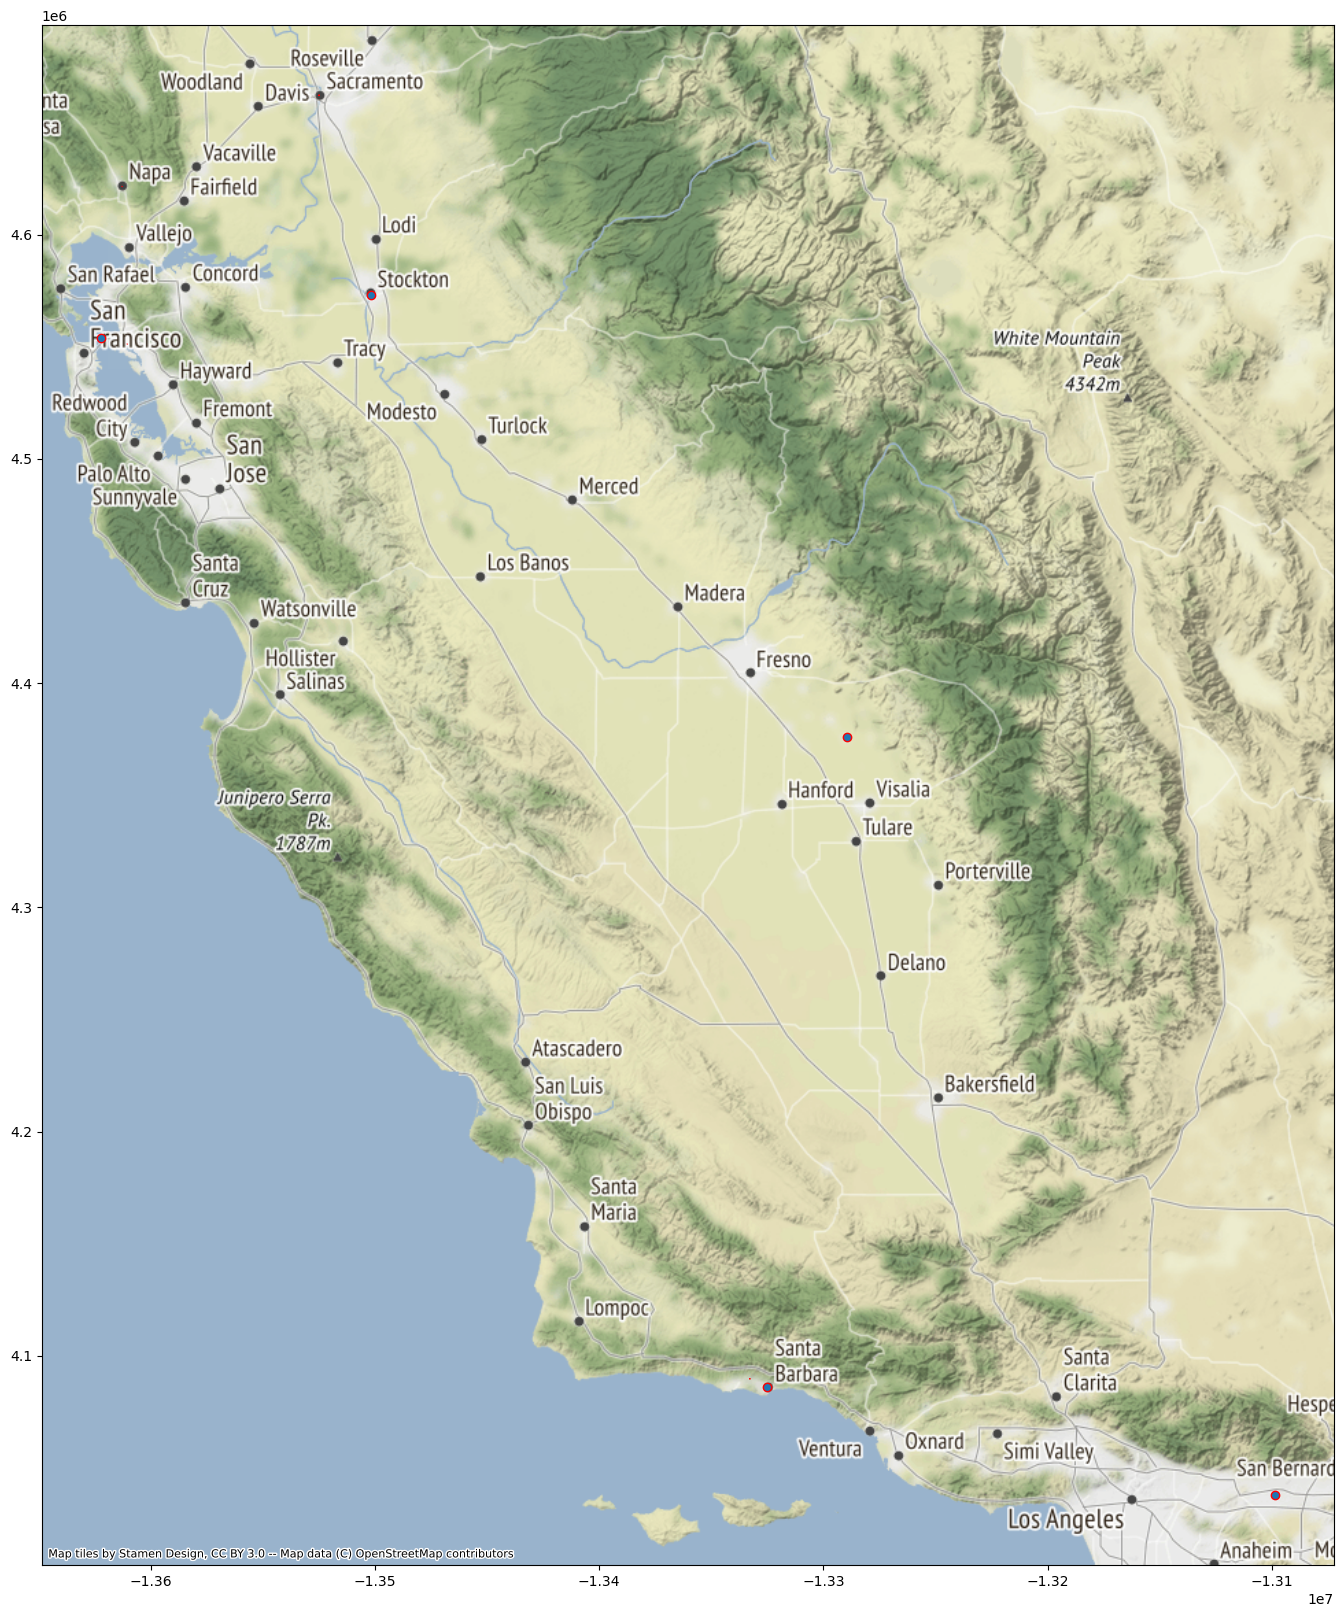

In [319]:
# Plot the city hall in whole CA state
import contextily as ctx
city = city_proj4.to_crs(epsg=3857) # This EPSG-3857 just for ploting
ax = city.plot(figsize=(20, 20), alpha=1, edgecolor='red')
ctx.add_basemap(ax)

In [320]:
eco.crs

<Derived Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [321]:
# Distance to CBD
eco['min_dist_to_city_hall'] = eco.geometry.apply(min_distance_ppoly, args=(city_proj4,))*0.000621371
output_cbd_distance=eco.loc[:,["id","min_dist_to_city_hall"]]
output_cbd_distance.columns=["id","min_dist_to_CBD"]
output_cbd_distance.head()

id  min_dist_to_CBD
0  100000572         5.437166
1  100000595         5.053731
2  100000671         5.153850
3  100001127         3.019345
4  100002415         4.642047

In [322]:
output_cbd_distance['min_dist_to_CBD'].describe()

count    386.000000
mean      45.733277
std       40.561532
min        0.538643
25%        5.298949
50%       34.307530
75%       85.397579
max      202.420563
Name: min_dist_to_CBD, dtype: float64

# Aggregate all the extracted data together

In [323]:
gdf2=gdf1[['id','lat','long','user_type','OSM Functional Class','City Bicycle Facilities','Location_County','geometry']]
gdf3=gpd.GeoDataFrame(gdf2, geometry='geometry', crs={'init': 'epsg:32610'})
gdf3.head()

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


id        lat        long                 user_type  \
0  100000572  37.798027 -122.467575                pedestrian   
1  100000595  37.792583 -122.458150                pedestrian   
2  100000671  37.791160 -122.459440  ['bicycle' 'pedestrian']   
3  100001127  37.796165 -122.419490                   bicycle   
4  100002415  37.774200 -122.436295                   bicycle   

  OSM Functional Class City Bicycle Facilities Location_County  \
0            secondary                   Trail   San Francisco   
1            secondary                   Trail   San Francisco   
2                 path                    Path   San Francisco   
3              primary              Bike Route   San Francisco   
4              primary               Bike Lane   San Francisco   

                                            geometry  
0  POLYGON ((547678.248 4183539.562, 547674.373 4...  
1  POLYGON ((548511.512 4182940.320, 548507.637 4...  
2  POLYGON ((548398.847 4182781.782, 548394.972 4...  
3  POLYGON ((551912.868 4183358.173, 551908.993 4...  
4  POLYGON ((550448.031 4180912.115, 550444.157 4...

In [324]:
from functools import reduce
import pandas as pd
# compile the list of dataframes you want to merge
df_all = [gdf3,output_cbd_distance,output_commercial,commercialcc_distance,output_retail,retailcc_distance,output_industrial,industrialcc_distance,
          output_residential,residentialcc_distance,output_grass,grasscc_distance,output_forest,forestcc_distance,output_education,
         educationcc_distance,output_institutional,institutionalcc_distance,output_water,watercc_distance,output_park,parkcc_distance,
         output_school,output_school_distance,output_college,output_college_distance,output_university,output_university_distance]

In [325]:
#Merge by ID
df_merged_eco = reduce(lambda  left,right: pd.merge(left,right,on=['id'],
                                            how='left'), df_all).fillna('0')
df_merged_eco1=df_merged_eco.drop_duplicates(subset=['id'],keep='first')
df_merged_eco1.head()

id        lat        long                 user_type  \
0  100000572  37.798027 -122.467575                pedestrian   
1  100000595  37.792583 -122.458150                pedestrian   
2  100000671  37.791160 -122.459440  ['bicycle' 'pedestrian']   
3  100001127  37.796165 -122.419490                   bicycle   
4  100002415  37.774200 -122.436295                   bicycle   

  OSM Functional Class City Bicycle Facilities Location_County  \
0            secondary                   Trail   San Francisco   
1            secondary                   Trail   San Francisco   
2                 path                    Path   San Francisco   
3              primary              Bike Route   San Francisco   
4              primary               Bike Lane   San Francisco   

                                            geometry  min_dist_to_CBD  \
0  POLYGON ((547678.248 4183539.562, 547674.373 4...         5.437166   
1  POLYGON ((548511.512 4182940.320, 548507.637 4...         5.053731   
2  POLYGON ((548398.847 4182781.782, 548394.972 4...         5.153850   
3  POLYGON ((551912.868 4183358.173, 551908.993 4...         3.019345   
4  POLYGON ((550448.031 4180912.115, 550444.157 4...         4.642047   

  Commercial Area   ...  water Area  Distance to water area       park Area   \
0                0  ...            0            3773.867083  21852546.671638   
1                0  ...  2349.068262             942.068718  15945148.053215   
2                0  ...  2349.068262            1551.397299  13984226.421319   
3     61003.215271  ...            0            2979.265286    389382.313417   
4                0  ...   379.797971             446.219928   2050425.904297   

  Distance to Park Center  School min_dist_to_school  college  \
0              416.233608       0        3288.652324        0   
1             2883.090944     3.0        1959.445065        0   
2             3001.246142     1.0        1497.327703        0   
3              370.100124     6.0         749.720534      1.0   
4              911.540449     4.0        1870.885280        0   

  min_dist_to_college  University min_dist_to_university  
0         7041.814444           0            8755.927125  
1         3678.395055           0            5749.047003  
2         3687.619978           0            5419.578760  
3         2114.572262           0            2851.410576  
4         3065.562043           0            3066.603072  

[5 rows x 35 columns]

In [326]:
df_merged_eco2=gpd.GeoDataFrame(df_merged_eco1, geometry='geometry', crs='EPSG:32610') 
df_merged_eco3=df_merged_eco2.to_crs(epsg=4326)

In [327]:
# If you want to export the excel
pd.DataFrame.to_csv(df_merged_eco3, 'Eco_CA_data_circular_0.5_mile_buffer.csv', sep=',', na_rep='0', index=False)

# Import KeplerGL Dynamic Map

In [328]:
df_merged_eco1.isnull().values.any()

False

In [329]:
#!conda install -c conda-forge keplergl

In [330]:
#!pip install keplergl==0.1.1
#!jupyter nbextension install --py --sys-prefix keplergl
#!jupyter nbextension enable --py --sys-prefix keplergl


In [331]:
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager keplergl-jupyter

In [332]:
# Load an empty map
from keplergl import KeplerGl
map_1 = KeplerGl()
map_1

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl()

In [333]:
#!conda install -c conda-forge nodejs
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [334]:
# Load a map with data and config and height
from keplergl import KeplerGl
data=pd.read_csv("Eco_CA_data_circular_0.5_mile_buffer.csv")
#data=data.fillna(0)
map_2 =KeplerGl(height=300, data={"data_1":data})
map_2

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(data={'data_1':             id        lat        long                 user_type  \
0    100000572  37…

In [335]:
# save as htm file
map_2.save_to_html(file_name="CA_keplergl_circular_0.5_mile_buffer.html")

Map saved to CA_keplergl_circular_0.5_mile_buffer.html!


In [336]:
end = time.time()
print("Total Run Time:", end - start)

Total Run Time: 772.2033498287201
